# Machine learning summative assessment - Airline Avionics - Abimbola O.

## Task 1 Import and clean data

As always the first step is to import the libraries you will need for this exercise, 
along with the standard libaries for data manipulation and plotting, you will need to import machine learning 
libraries too. Once we have the libraries we need imported, we can import our data. The raw data file  for this 
exercise is

Some of our columns have lots of missing data and NA values. You will need to clean this data by dropping 
some rows or replacing NA's. Once you are finished your data should be clean and ready to use. i.e. no missing 
data, column are in the correct format.

In [1]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Task 2 Inspect and visualize the data

Before we start any analysis it is important to understand the structure of the data we are working with. 
What is the range of each variable, how is it distributed, are there outliers, show the variables are related 
etc. Produce some plots that help you to understand the structure of the S.M.A.R.T variables

In [2]:
# Import data
data =  pd.read_csv('ml_summative_raw.csv', parse_dates=['date'])

In [3]:
#Replace non-ASCII characters with a single space in the columns
data.columns = [''.join([i if ord(i) < 128 else ' ' for i in col]) for col in data.columns]

In [4]:
data.columns #see data column headings

Index(['Unnamed: 0', 'date', 'serial_number', 'model', 'capacity_bytes',
       'failure', 'Throughput Performance', 'Spin-Up Time', 'Start/Stop Count',
       'Reallocated Sectors Count', 'Seek Error Rate', 'Seek Time Performance',
       'Power-On Hours', 'Spin Retry Count',
       'Recalibration Retriesor Calibration Retry Count', 'Power Cycle Count',
       'Soft Read Error Rate', 'smart_15', 'Current Helium Level',
       'SATA Downshift Error Count or Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes',
       'Temperature Difference or Airflow Temperature', 'G-sense Error Rate',
       'Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count',
       'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)',
       'Temperature or Temperature Celsius', 'Hardware ECC Recovered',
       'Reallocation Event Count', 'Current Pending Sector Count',
       '(Offline) Uncorrect

In [5]:
type(data) #confirm data is a dataframe

pandas.core.frame.DataFrame

In [6]:
data.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


In [7]:
data.shape

(75130, 50)

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,75130.0,3.756550e+04,2.168831e+04,1.000000,1.878325e+04,3.756550e+04,5.634775e+04,7.513000e+04
capacity_bytes,75130.0,3.666340e+12,1.423955e+12,-1.000000,4.000787e+12,4.000787e+12,4.000787e+12,8.001563e+12
failure,75130.0,1.859444e-02,1.350886e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Throughput Performance,9626.0,1.300846e+02,3.426775e+01,100.000000,1.000000e+02,1.330000e+02,1.340000e+02,2.520000e+02
Spin-Up Time,75128.0,1.021748e+02,2.157728e+01,85.000000,9.200000e+01,9.500000e+01,9.800000e+01,2.530000e+02
Start/Stop Count,75128.0,9.998561e+01,4.810552e-01,83.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Reallocated Sectors Count,75128.0,1.091281e+02,3.105552e+01,1.000000,1.000000e+02,1.000000e+02,1.000000e+02,2.520000e+02
Seek Error Rate,75128.0,9.319250e+01,2.642911e+01,26.000000,8.400000e+01,8.700000e+01,9.000000e+01,2.520000e+02
Seek Time Performance,9626.0,1.206493e+02,3.488449e+01,11.000000,1.000000e+02,1.130000e+02,1.220000e+02,2.520000e+02
Power-On Hours,75128.0,8.316545e+01,1.357176e+01,1.000000,7.400000e+01,8.500000e+01,9.400000e+01,1.000000e+02


In [8]:
# Begin process of cleaning data 
# https://en.wikipedia.org/wiki/S.M.A.R.T
# 1. Drop the following data because they have no values and are not critical to HDD performance, 34 columns left
data_drop = data.drop(['Soft Read Error Rate', 'smart_15', 'Current Helium Level','Soft Read Error Rateor', 
                       'Disk Shift','Loaded Hours', 'Load/Unload Retry Count', 'Load Friction','Load/Unload Cycle Count',
                       'Read Error Retry Rate','Minimum Spares Remaining', 'Newly Added Bad Flash Block','Free Fall Protection','Load In-time'], axis=1)


In [9]:
#2. Analyse rows by filling na

#fill na with mean
data_drop['Throughput Performance'].fillna(data_drop['Throughput Performance'].mean(), inplace=True)
data_drop['Seek Time Performance'].fillna(data_drop['Seek Time Performance'].mean(), inplace=True)
data_drop['High Fly Writes']. fillna(data_drop['High Fly Writes'].mean(), inplace=True)
data_drop['Temperature Difference or Airflow Temperature'].fillna(data_drop['Temperature Difference or Airflow Temperature'].mean(), inplace=True)
data_drop['Temperature or Temperature Celsius'].fillna(data_drop['Temperature or Temperature Celsius'].mean(), inplace=True)
data_drop["Load Cycle Count or Load/Unload Cycle Count (Fujitsu)"].fillna(data_drop["Load Cycle Count or Load/Unload Cycle Count (Fujitsu)"].mean(), inplace=True)   
data_drop['Hardware ECC Recovered'].fillna(data_drop['Hardware ECC Recovered'].mean(), inplace=True)
data_drop['Read Error Rate'].fillna(data_drop['Read Error Rate'].mean(), inplace=True)
 
# Fill na with mode    
data_drop['Spin-Up Time'].fillna(data_drop['Spin-Up Time'].mode()[0], inplace=True)
data_drop['Start/Stop Count'].fillna(data_drop['Start/Stop Count'].mode()[0], inplace=True)
data_drop['Reallocated Sectors Count'].fillna(data_drop['Reallocated Sectors Count'].mode()[0], inplace=True)
data_drop['Seek Error Rate'].fillna(data_drop['Seek Error Rate'].mode()[0], inplace=True)
data_drop['Power-On Hours'].fillna(data_drop['Power-On Hours'].mode()[0], inplace=True)
data_drop['Spin Retry Count'].fillna(data_drop['Spin Retry Count'].mode()[0], inplace=True)
data_drop['Power Cycle Count'].fillna(data_drop['Power Cycle Count'].mode()[0], inplace=True)
data_drop['SATA Downshift Error Count or Runtime Bad Block'].fillna(data_drop['SATA Downshift Error Count or Runtime Bad Block'].mode()[0], inplace=True)
data_drop['Reallocation Event Count'].fillna(data_drop['Reallocation Event Count'].mode()[0], inplace=True)
data_drop['G-sense Error Rate'].fillna(data_drop['G-sense Error Rate'].mode()[0], inplace=True)
data_drop["Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count"].fillna(data_drop["Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count"].mode()[0], inplace=True)
data_drop['UltraDMA CRC Error Count'].fillna(data_drop['UltraDMA CRC Error Count'].mode()[0], inplace=True)
data_drop['Write Error Rate(Fujitsu)'].fillna(data_drop['Write Error Rate(Fujitsu)'].mode()[0], inplace=True)
data_drop['Total LBAs Written'].fillna(data_drop['Total LBAs Written'].mode()[0], inplace=True)
data_drop['Total LBAs Read'].fillna(data_drop['Total LBAs Read'].mode()[0], inplace=True)
data_drop['Recalibration Retriesor Calibration Retry Count'].fillna(data_drop['Recalibration Retriesor Calibration Retry Count'].mode()[0], inplace=True)
data_drop["Head Flying Hours or 'Transfer Error Rate'(Fujitsu)"].fillna(data_drop["Head Flying Hours or 'Transfer Error Rate'(Fujitsu)"].mode()[0], inplace=True)

In [10]:
# Round up the values to zero
data_round = data_drop.round(0)

In [11]:
data_round.to_csv('output_5.csv')

In [12]:
data_round.isnull().sum()

Unnamed: 0                                                                                     0
date                                                                                           0
serial_number                                                                                  0
model                                                                                          0
capacity_bytes                                                                                 0
failure                                                                                        0
Throughput Performance                                                                         0
Spin-Up Time                                                                                   0
Start/Stop Count                                                                               0
Reallocated Sectors Count                                                                      0
Seek Error Rate               

In [13]:
#3. Drop the other rows with null values as we cannot assume values because they are critical data 
hdd = data_round.dropna()

In [14]:
hdd.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Hardware ECC Recovered,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,130.0,96.0,100.0,100.0,...,47.0,100.0,100.0,100.0,200.0,100.0,100.0,100.0,100.0,114.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,130.0,91.0,100.0,100.0,...,47.0,100.0,100.0,100.0,200.0,100.0,100.0,100.0,100.0,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,130.0,91.0,100.0,100.0,...,47.0,100.0,100.0,100.0,200.0,100.0,100.0,100.0,100.0,117.0
5,6,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,130.0,91.0,100.0,100.0,...,47.0,100.0,100.0,100.0,200.0,100.0,100.0,100.0,100.0,115.0
6,7,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,130.0,92.0,100.0,100.0,...,47.0,100.0,100.0,100.0,200.0,100.0,100.0,100.0,100.0,117.0


In [15]:
hdd.shape

(59171, 36)

In [16]:
# Some EDA of the dataset before and after data drop
data['failure'].value_counts(normalize=True)

0    0.981406
1    0.018594
Name: failure, dtype: float64

In [17]:
hdd['failure'].value_counts(normalize=True)

0    0.981596
1    0.018404
Name: failure, dtype: float64

##### The split of trues and falses stays relatively thesame 

Text(0, 0.5, '% change')

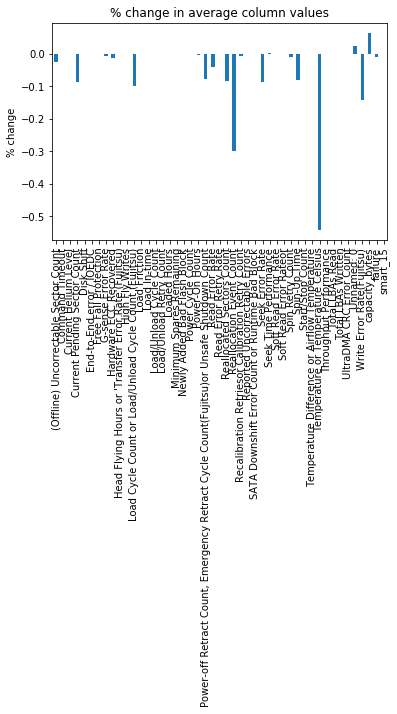

In [18]:
# % change in means as a bar chart
ax = ((hdd.mean() - data.mean()) / data.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')

##### Temperature or Temperature celsius and Reallocation sector count  has the highest change in means after dropping null values. With Temperature taking about 55% change. Quite a high jump.

In [19]:
#Info of dataframe after cleaning. 
hdd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59171 entries, 0 to 75129
Data columns (total 36 columns):
Unnamed: 0                                                                                 59171 non-null int64
date                                                                                       59171 non-null datetime64[ns]
serial_number                                                                              59171 non-null object
model                                                                                      59171 non-null object
capacity_bytes                                                                             59171 non-null int64
failure                                                                                    59171 non-null int64
Throughput Performance                                                                     59171 non-null float64
Spin-Up Time                                                                               591

#### Total Number of observations: 75128, Total number of attributes: 36

In [20]:
#Check the data summary statistics
hdd.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,59171.0,3.842210e+04,2.147764e+04,1.000000e+00,2.025350e+04,3.907800e+04,5.664650e+04,7.513000e+04
capacity_bytes,59171.0,3.902991e+12,1.252989e+12,1.600419e+11,4.000787e+12,4.000787e+12,4.000787e+12,8.001563e+12
failure,59171.0,1.840429e-02,1.344094e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Throughput Performance,59171.0,1.300000e+02,0.000000e+00,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02
Spin-Up Time,59171.0,9.396931e+01,3.160627e+00,8.500000e+01,9.100000e+01,9.300000e+01,9.600000e+01,1.380000e+02
Start/Stop Count,59171.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Reallocated Sectors Count,59171.0,9.998905e+01,3.536757e+00,2.800000e+01,1.000000e+02,1.000000e+02,1.000000e+02,2.000000e+02
Seek Error Rate,59171.0,8.510698e+01,4.770722e+00,2.600000e+01,8.400000e+01,8.700000e+01,8.800000e+01,1.000000e+02
Seek Time Performance,59171.0,1.210000e+02,0.000000e+00,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
Power-On Hours,59171.0,8.282476e+01,1.064841e+01,3.500000e+01,7.400000e+01,8.300000e+01,9.200000e+01,1.000000e+02


## Visualizations

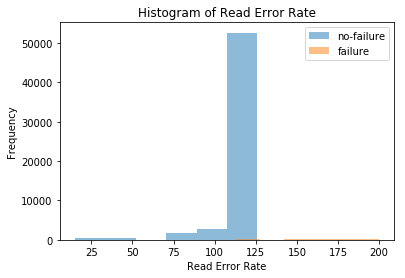

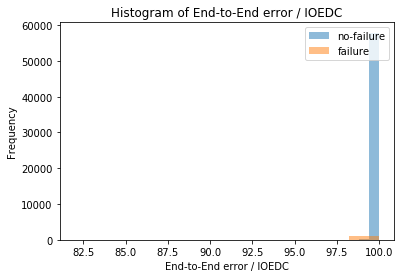

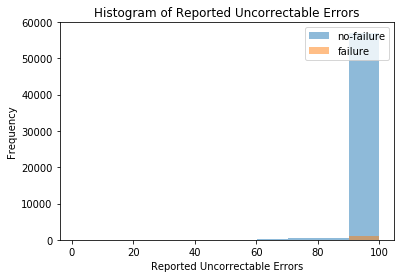

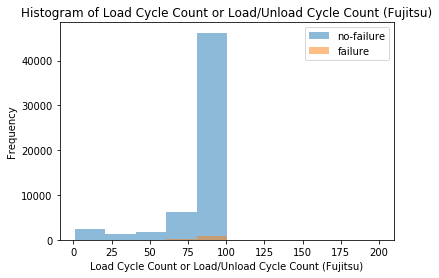

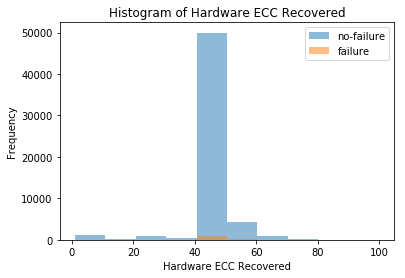

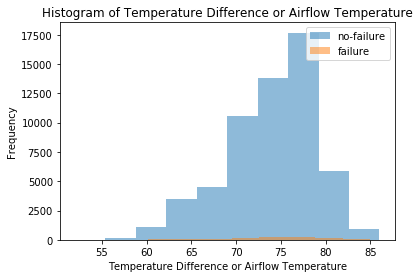

In [21]:
#Reveal some pattern about those that failed and those that did not
for col in ['Read Error Rate','End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)', 'Hardware ECC Recovered', 'Temperature Difference or Airflow Temperature']:
    plt.hist(hdd[hdd['failure']==0][col], 10, alpha=0.5, label='no-failure')
    plt.hist(hdd[hdd['failure']==1][col], 10, alpha=0.5, label='failure')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

  #### From the Read error rate diagram, failure is seen at a read error rate of 110 and above but some devices still did not fail. Read error seems to be a strong parameter in determining harddrive failure. Another interesting one is the end-to end error, it shows that  devices failed at 98 to 100 but majority didn't fail at 100. Reported uncorrectable errors seems to have no effect. A thing to note is that the data is not balanced. It will be much more beneficiary to have a data with 50 % unfailed devices and 50 % failed devices to feed our model.

In [22]:
#Dropping off all constants columns
for i in hdd.columns:
    if len(hdd.loc[:,i].unique()) == 1:
        hdd.drop(i, axis=1, inplace=True)


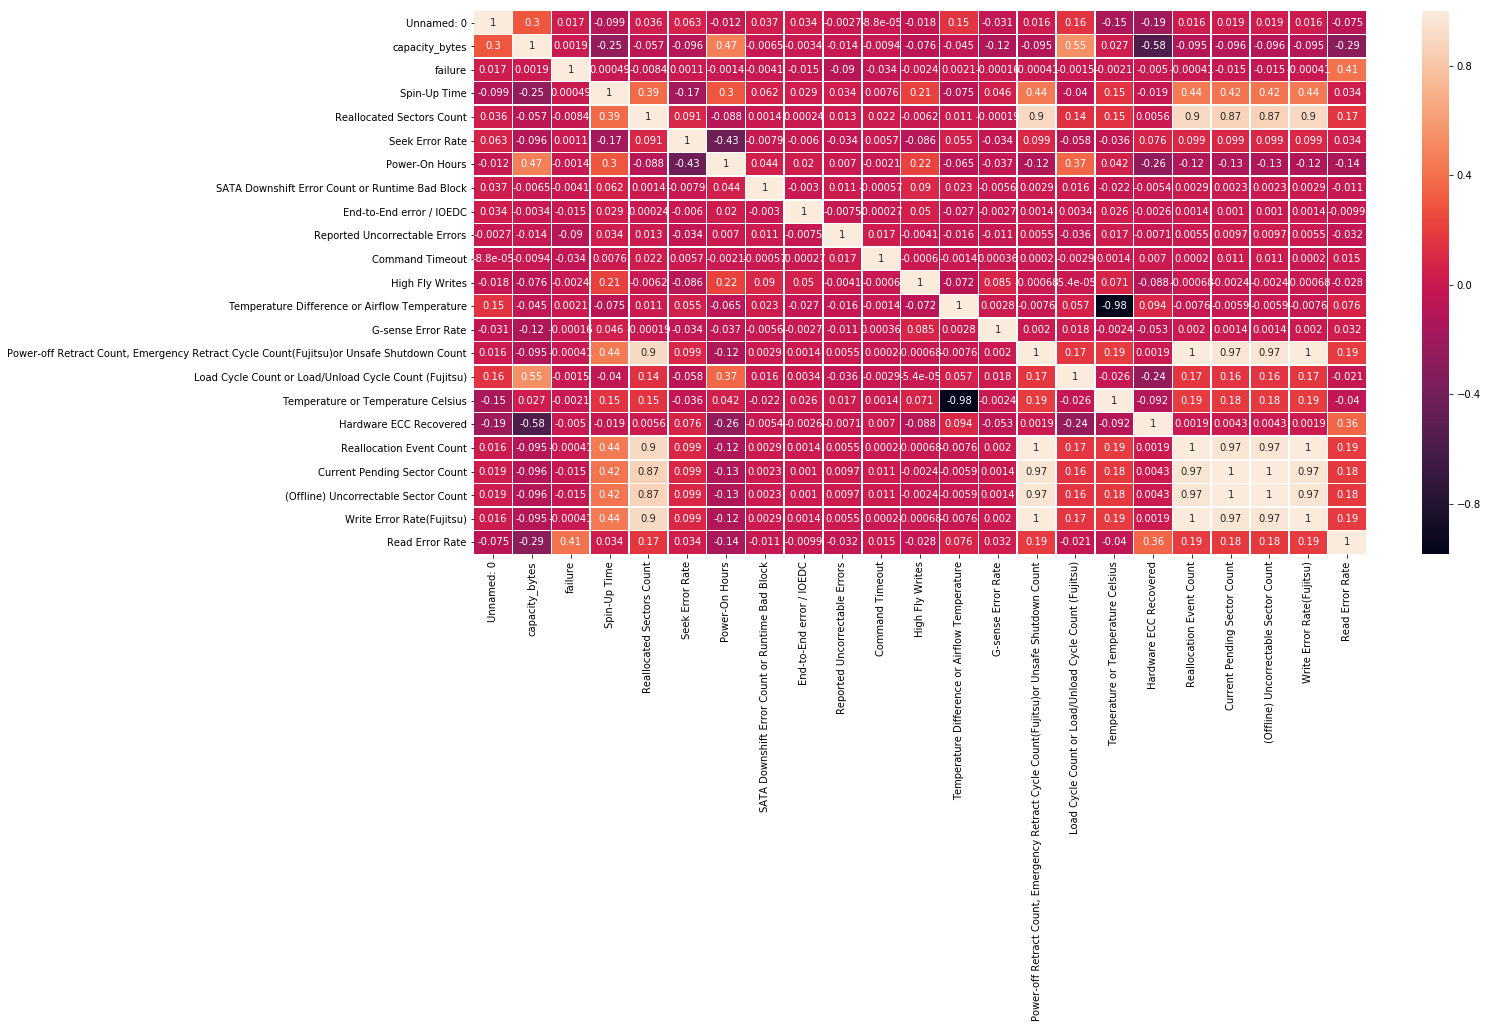

In [23]:
#Checking for correlation between features
fig, ax = plt.subplots(figsize=(20,10))
corr = hdd[hdd.columns].corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

#### So many highly correlated attributes that can affect the algorithm. This highly correlated variables will be dropped.

## Task 3 Feature engineering

Based on what you learnt about your data through your visualizations, you might want to manipulate it somehow. 
Perhaps you want to drop some outliers, or remove a highly correlated variable, maybe you want to rescale data 
with a strange distribution. Feature engineering is the most creative part of machine learning. There is no 
definitively right or wrong answer. But coming up with clever variables can make you final model more accurate. 
Try to come up some new variables. Ideas include using the date somehow.

In [24]:
# Write data to a csv for a glance
# hdd.to_csv('output_1.csv')

In [25]:
# Rearrange data for plotting
plot = hdd.drop(['Unnamed: 0'], axis=1)

In [26]:
# Observe data patterns and insight
defaultid = hdd[hdd.failure == 1].serial_number.unique()
print("Total devices which failed out of 1113 devices = ",
      hdd[hdd.serial_number.isin(defaultid)].serial_number.nunique())
print("Total devices which did not fail out of 1113 devices = ",
      hdd[~hdd.serial_number.isin(defaultid)].serial_number.nunique())
print("Total unique devices = ", hdd.serial_number.nunique())

Total devices which failed out of 1113 devices =  1089
Total devices which did not fail out of 1113 devices =  24
Total unique devices =  1113


Based on this 1113 unique devices with 365 days of 
data. About 97.8% of the devices failed after a year

In [27]:
#Drop off highly correlated variables to avoid 
#multicollinearity which can affect regression algorithm
hdd_final = hdd.drop(['Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count',
                     'Reallocated Sectors Count','Reallocation Event Count',
                     '(Offline) Uncorrectable Sector Count', 'Write Error Rate(Fujitsu)', 'Temperature Difference or Airflow Temperature'], axis=1)


In [28]:
# Features to be used on the model
hdd_final.columns

Index(['Unnamed: 0', 'date', 'serial_number', 'model', 'capacity_bytes',
       'failure', 'Spin-Up Time', 'Seek Error Rate', 'Power-On Hours',
       'SATA Downshift Error Count or Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes', 'G-sense Error Rate',
       'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)',
       'Temperature or Temperature Celsius', 'Hardware ECC Recovered',
       'Current Pending Sector Count', 'Read Error Rate'],
      dtype='object')

In [29]:
#Group the data by serial_number

hdd_group = hdd_final.groupby(['serial_number'])
hdd_group.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,96.0,77.0,99.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,26.0,47.0,100.0,114.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,91.0,84.0,81.0,99.0,100.0,100.0,100.0,81.0,100.0,91.0,24.0,47.0,100.0,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,91.0,88.0,76.0,100.0,100.0,100.0,100.0,100.0,100.0,85.0,28.0,47.0,100.0,117.0
5,6,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,91.0,85.0,78.0,99.0,100.0,100.0,100.0,97.0,100.0,75.0,32.0,47.0,100.0,115.0
6,7,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,92.0,88.0,75.0,100.0,100.0,100.0,100.0,99.0,100.0,92.0,25.0,47.0,100.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73028,73029,2016-11-30,Z3049EGT,ST4000DM000,4000787030016,1,96.0,100.0,100.0,100.0,100.0,73.0,100.0,100.0,100.0,100.0,23.0,47.0,100.0,191.0
74816,74817,2016-12-18,ZA13ANRK,ST8000DM002,8001563222016,0,98.0,61.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,44.0,12.0,100.0,80.0
74874,74875,2016-12-19,ZA13ANRK,ST8000DM002,8001563222016,0,98.0,66.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,43.0,6.0,100.0,79.0
74930,74931,2016-12-20,ZA13ANRK,ST8000DM002,8001563222016,0,98.0,68.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,43.0,6.0,100.0,49.0


In [30]:
#Check out the first day and last day of operation of the devices
hdd_last_day = hdd_group.nth(-1)
hdd_first_day = hdd_group.nth(1)

In [31]:
hdd_first_day

,Unnamed: 0,date,model,capacity_bytes,failure,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,,
5VML01P0,1446,2016-01-08,ST3160318AS,160041885696,0,97.0,87.0,52.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,28.0,56.0,100.0,119.0
6VDHZK5M,21064,2016-04-04,ST9320325AS,320072933376,0,99.0,82.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,23.0,54.0,100.0,119.0
6VMX70TB,17201,2016-03-19,ST3160316AS,160041885696,0,100.0,86.0,55.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,27.0,55.0,100.0,119.0
6VY16NA1,18990,2016-03-27,ST3160318AS,160041885696,0,97.0,87.0,60.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,31.0,60.0,100.0,120.0
9VMHY7KX,18108,2016-03-23,ST3160318AS,160041885696,0,98.0,87.0,47.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,25.0,62.0,100.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZA12RB60,57063,2016-09-13,ST8000DM002,8001563222016,0,99.0,87.0,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,36.0,26.0,100.0,76.0
ZA13ANRK,74875,2016-12-19,ST8000DM002,8001563222016,0,98.0,66.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,43.0,6.0,100.0,79.0
ZA13EX9B,62601,2016-10-08,ST8000DM002,8001563222016,0,96.0,75.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,23.0,22.0,100.0,78.0


In [32]:
hdd_last_day

,Unnamed: 0,date,model,capacity_bytes,failure,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,,
5VML01P0,13908,2016-03-06,ST3160318AS,160041885696,1,97.0,87.0,51.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,33.0,55.0,100.0,151.0
6VDHZK5M,34928,2016-06-01,ST9320325AS,320072933376,1,99.0,82.0,81.0,100.0,100.0,100.0,100.0,100.0,100.0,64.0,26.0,53.0,100.0,119.0
6VMX70TB,31497,2016-05-16,ST3160316AS,160041885696,0,100.0,86.0,54.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,27.0,46.0,100.0,112.0
6VY16NA1,33149,2016-05-24,ST3160318AS,160041885696,1,97.0,87.0,59.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,30.0,52.0,100.0,182.0
6XW00MWE,44826,2016-07-21,ST31500541AS,1500301910016,1,100.0,92.0,49.0,100.0,100.0,100.0,100.0,99.0,100.0,95.0,29.0,60.0,100.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZA12RB60,69707,2016-11-10,ST8000DM002,8001563222016,1,99.0,91.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,43.0,100.0,100.0,151.0
ZA13ANRK,74982,2016-12-21,ST8000DM002,8001563222016,1,98.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,44.0,17.0,100.0,177.0
ZA13EX9B,67932,2016-11-01,ST8000DM002,8001563222016,1,85.0,85.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,23.0,5.0,100.0,189.0


In [33]:
#Combine this 2 data frames into one
hdd_feat = hdd_first_day.append(hdd_last_day)
hdd_feat.head()

,Unnamed: 0,date,model,capacity_bytes,failure,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
serial_number,,,,,,,,,,,,,,,,,,,
5VML01P0,1446,2016-01-08,ST3160318AS,160041885696,0,97.0,87.0,52.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,28.0,56.0,100.0,119.0
6VDHZK5M,21064,2016-04-04,ST9320325AS,320072933376,0,99.0,82.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,23.0,54.0,100.0,119.0
6VMX70TB,17201,2016-03-19,ST3160316AS,160041885696,0,100.0,86.0,55.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,27.0,55.0,100.0,119.0
6VY16NA1,18990,2016-03-27,ST3160318AS,160041885696,0,97.0,87.0,60.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,31.0,60.0,100.0,120.0
9VMHY7KX,18108,2016-03-23,ST3160318AS,160041885696,0,98.0,87.0,47.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,25.0,62.0,100.0,117.0


In [34]:
hdd_feature = hdd_feat.drop(['Unnamed: 0','date','model','capacity_bytes'], axis=1)
hdd_feature = hdd_feature.reset_index(drop=True)    # Reset index
hdd_feature

,failure,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
0,0,97.0,87.0,52.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,28.0,56.0,100.0,119.0
1,0,99.0,82.0,83.0,100.0,100.0,100.0,100.0,100.0,100.0,68.0,23.0,54.0,100.0,119.0
2,0,100.0,86.0,55.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,27.0,55.0,100.0,119.0
3,0,97.0,87.0,60.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,31.0,60.0,100.0,120.0
4,0,98.0,87.0,47.0,100.0,100.0,100.0,100.0,100.0,100.0,95.0,25.0,62.0,100.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,1,99.0,91.0,98.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,43.0,100.0,100.0,151.0
2209,1,98.0,70.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,44.0,17.0,100.0,177.0
2210,1,85.0,85.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,23.0,5.0,100.0,189.0
2211,1,90.0,87.0,99.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,36.0,5.0,100.0,195.0


In [35]:
hdd_feature['failure'].value_counts(normalize=True)

0    0.5061
1    0.4939
Name: failure, dtype: float64

#### Now 49% of our data are failed devices. We have now a balanced data

## Task 4 Model fitting

The meat and potatoes of the exercise - fitting models. You will need to perform a few standard steps first. 
This will include, but not be limited to:  encodeing categorical variables/factors , defining predictors and 
response variables. splitting data to evaluate model fit later.

Once you have finished these prep steps, you will have to choose an appropriate model type to fit to these data. 
You are welcome to try multiple models, or combine multiple models. Whatever works best, it's up to you. 
But remember, not all models are appropriate and some are more accurate than others

## Building models using the selected features

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score


In [37]:
#Values for predictor, dropping off the target
X = hdd_feature.drop(['failure'], axis=1)

#Values for target
y = hdd_feature['failure'].values # y is output (or dependent) variable

# Standardize the data
X = MinMaxScaler().fit_transform(X)

In [38]:
hdd_feature['failure'].value_counts(normalize=True)
# get null accuracy, 50 % did not fail

0    0.5061
1    0.4939
Name: failure, dtype: float64

In [39]:
#Train Test split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=y
                                                   , random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1770, 14), (443, 14), (1770,), (443,))

In [40]:
def CMatrix(CM, labels=['not-fail','fail']):
    df = pd.DataFrame(data=CM, index = labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

### Preparing a DataFrame for model analysis

In [41]:
# Dataframe for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'], 
                      columns=['Logistic-Reg','Decision-Tree', 'RandomForest-Class', 'Gradient-Boost', 'SVM'])

In [42]:
fitting = pd.DataFrame(index=['Train_score', 'Test_score'], 
                      columns=['Logistic-Reg','Decision-Tree', 'RandomForest-Class', 'Gradient-Boost', 'SVM'])

## A. Logistic Regression

In [43]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','Logistic-Reg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Logistic-Reg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Logistic-Reg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','Logistic-Reg'] = f1_score(y_pred=y_pred_test, y_true=y_test)
fitting.loc['Train_score','Logistic-Reg'] = logistic_regression.score(X_train, y_train)
fitting.loc['Test_score','Logistic-Reg'] = logistic_regression.score(X_test, y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,not-fail,fail,Total
TRUE,,,
not-fail,224,0,224
fail,60,159,219
Total,284,159,443


#### Logistic regression model has 0 false positives and 60 false negatives. A total of 60 not correctly classified.

## B. Classification Trees

In [44]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','Decision-Tree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Decision-Tree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Decision-Tree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','Decision-Tree'] = f1_score(y_pred=y_pred_test, y_true=y_test)
fitting.loc['Train_score','Decision-Tree'] = class_tree.score(X_train, y_train)
fitting.loc['Test_score','Decision-Tree'] = class_tree.score(X_test, y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,not-fail,fail,Total
TRUE,,,
not-fail,212,12,224
fail,44,175,219
Total,256,187,443


#### Classification tree model has 12 false positives and 44 false negatives. A total of 56 not correctly classified.

## C. Random Forest Classifier

In [45]:
# 1. Import the estimator object (model)
from sklearn.ensemble import RandomForestClassifier as RF

# 2. Create an instance of the estimator
rf = RF(n_estimators=18, min_samples_split=15, max_depth=5, random_state=42)

# 3. Use the trainning data to train the estimator
rf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = rf.predict(X_test)
metrics.loc['accuracy','RandomForest-Class'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest-Class'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest-Class'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','RandomForest-Class'] = f1_score(y_pred=y_pred_test, y_true=y_test)
fitting.loc['Train_score','RandomForest-Class'] = rf.score(X_train, y_train)
fitting.loc['Test_score','RandomForest-Class'] = rf.score(X_test, y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,not-fail,fail,Total
TRUE,,,
not-fail,218,6,224
fail,47,172,219
Total,265,178,443


#### Random forest model has 6 false positives and 47 false negatives. A total of 53 not correctly classified.

## D. Gradient Boosting

In [46]:
# 1. Import the estimator object (model)
from sklearn.ensemble import GradientBoostingClassifier as GB

# 2. Create an instance of the estimator
g_clf = GB(n_estimators=700, learning_rate=0.5, max_depth=15)

# 3. Use the trainning data to train the estimator
g_clf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = g_clf.predict(X_test)
metrics.loc['accuracy','Gradient-Boost'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Gradient-Boost'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Gradient-Boost'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','Gradient-Boost'] = f1_score(y_pred=y_pred_test, y_true=y_test)
fitting.loc['Train_score','Gradient-Boost'] = g_clf.score(X_train, y_train)
fitting.loc['Test_score','Gradient-Boost'] = g_clf.score(X_test, y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,not-fail,fail,Total
TRUE,,,
not-fail,210,14,224
fail,59,160,219
Total,269,174,443


#### Gradient Boost model has 14 false positives and 59 false negatives. A total of 73 not correctly classified.

## E. Support Vector Machine

In [47]:
# 1. Import the estimator object (model)
from sklearn.svm import SVC

# 2. Create an instance of the estimator
s_clf = SVC(kernel='linear')

# 3. Use the trainning data to train the estimator
s_clf.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = s_clf.predict(X_test)
metrics.loc['accuracy','SVM'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','SVM'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVM'] = recall_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['f1_score','SVM'] = f1_score(y_pred=y_pred_test, y_true=y_test)
fitting.loc['Train_score','SVM'] = s_clf.score(X_train, y_train)
fitting.loc['Test_score','SVM'] = s_clf.score(X_test, y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,not-fail,fail,Total
TRUE,,,
not-fail,224,0,224
fail,60,159,219
Total,284,159,443


#### SVM model similar to Logistic regression model has 0 false positives and 60 false negatives. A total of 60 not correctly classified. 

## Task 5 Model evaluation

How good is your model? Produce some metrics or visuals that give a measure of how well the model performs

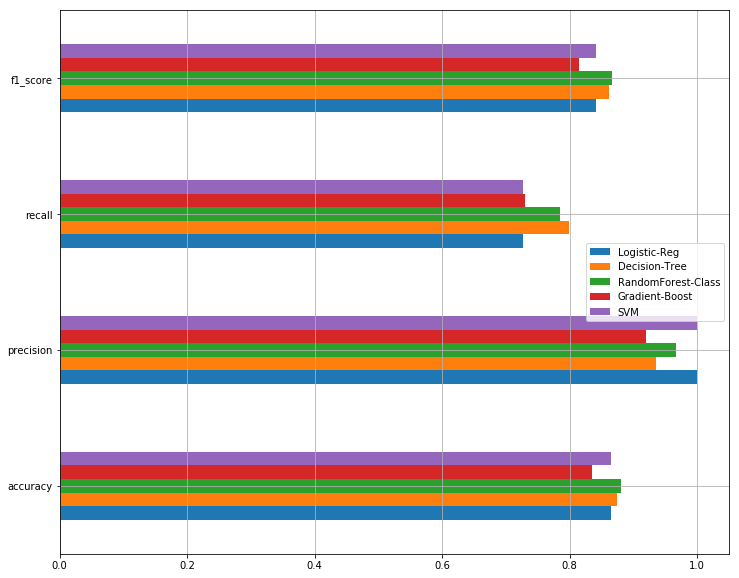

In [48]:
fig, ax = plt.subplots(figsize=(12,10))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [49]:
100*metrics

,Logistic-Reg,Decision-Tree,RandomForest-Class,Gradient-Boost,SVM
accuracy,86.456,87.3589,88.0361,83.5214,86.456
precision,100,93.5829,96.6292,91.954,100
recall,72.6027,79.9087,78.5388,73.0594,72.6027
f1_score,84.127,86.2069,86.6499,81.4249,84.127


#### Random forest model has the highest percentage of correct predictions on the test data with 97 % precision. Precision is highest in SVM and Logistic Regression which is 100%. Recall however is highest in decision tree model. The f1_score is seen to be higher in the random forest model

#### Optimizing for recall helps minimize the chance of not detecting a failed device. However, this comes at the cost of predicting failure in devices that are healthy.

#### We want a model in this case that will minimize false negatives. As it is more dangerous to predict that a device will not fail when it actually will. 


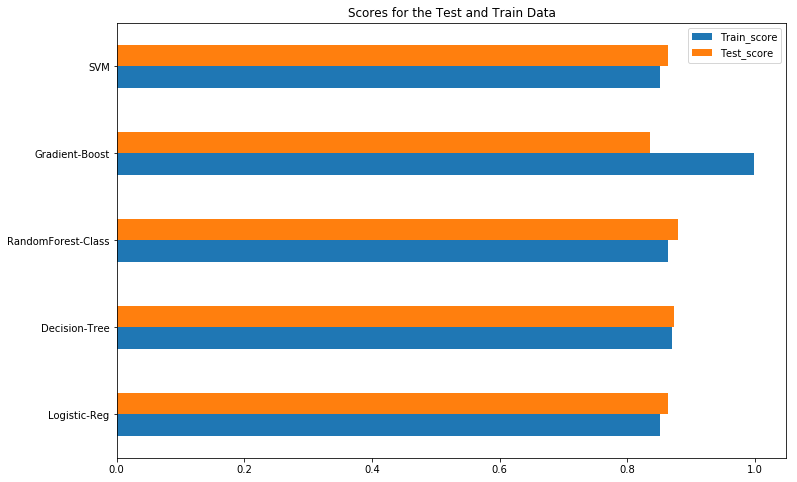

In [50]:
# Plot performance on test and train data
fig, ax = plt.subplots(figsize=(12,8))
fitting.T.plot(kind='barh', ax=ax)
ax.set_title('Scores for the Test and Train Data')
ax.legend(loc=1);

In [51]:

100*fitting

,Logistic-Reg,Decision-Tree,RandomForest-Class,Gradient-Boost,SVM
Train_score,85.0847,87.0056,86.3842,99.9435,85.0847
Test_score,86.456,87.3589,88.0361,83.5214,86.456


### Reciever Operating Characteristics

In [52]:
clf_labels = ['Logistic-Reg','Decision-Tree', 'RandomForest-Class', 'Gradient-Boost', 'SVM']
all_clf = [logistic_regression, class_tree, rf, g_clf, s_clf]

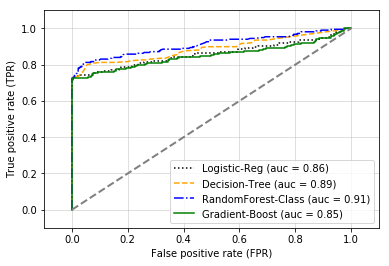

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
   in zip(all_clf, clf_labels, colors, linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
              color=clr,
              linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
          linestyle='--',
          color='gray',
          linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()


#### Highest roc-auc score is the random forest model

## Task 6 Produce recommendations

Well done, by now you have an advanced model capable of making accurate predictions on new data. 
We just received the latest SMART statistics from hard drives operating the avionics systems on a fleet of aircraft. You can find the data at

ml_summative_predict.csv

in the ML_summative folder

All the drives are currently working, but we don't want to take any risks. We need to replace all the drives that 
are at risk of failing. Use your model to make predictions on this new data. List the serial numbers of the 5 hard 
drives most likely to fail

In [54]:
# Feature importance according to the random forest model
feature_names = hdd_feature.drop('failure', axis=1).columns
feat_importance = pd.Series(data=rf.feature_importances_, index=feature_names)

In [55]:
feat_importance.sort_values(ascending=False)[0:4]

Read Error Rate                  0.645091
Reported Uncorrectable Errors    0.176693
Power-On Hours                   0.043824
Current Pending Sector Count     0.037487
dtype: float64

### The Topmost 3 important features are
1. Read Error Rate
2. Reported Uncorrectable Errors
3. Power On Hours

In [56]:
# Import new test data
hdd_new = pd.read_csv('ml_summative_predict.csv', sep=';')

In [57]:
#Replace non-ASCII characters with a single space in the columns
hdd_new.columns = [''.join([i if ord(i) < 128 else ' ' for i in col]) for col in hdd_new.columns]

In [58]:
# Data info
hdd_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 49 columns):
Unnamed: 0                                                                                 173 non-null int64
date                                                                                       173 non-null object
serial_number                                                                              173 non-null object
model                                                                                      173 non-null object
capacity_bytes                                                                             173 non-null object
Throughput Performance                                                                     20 non-null float64
Spin-Up Time                                                                               173 non-null int64
Start/Stop Count                                                                           173 non-null int64
Reallocate

In [59]:
# Load model data features
hdd_feature.columns

Index(['failure', 'Spin-Up Time', 'Seek Error Rate', 'Power-On Hours',
       'SATA Downshift Error Count or Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes', 'G-sense Error Rate',
       'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)',
       'Temperature or Temperature Celsius', 'Hardware ECC Recovered',
       'Current Pending Sector Count', 'Read Error Rate'],
      dtype='object')

In [60]:
# Create a new column for new test data
new_columns = ['Spin-Up Time', 'Seek Error Rate', 'Power-On Hours',
       'SATA Downshift Error Count or Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes', 'G-sense Error Rate',
       'Load Cycle Count or Load/Unload Cycle Count (Fujitsu)',
       'Temperature or Temperature Celsius', 'Hardware ECC Recovered',
       'Current Pending Sector Count', 'Read Error Rate']

In [61]:
# New dataframe with chosen features
hdd_pred = hdd_new[new_columns]

In [62]:
# View first 5 rows
hdd_pred.head()

,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
0,92,75,99,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32,NaN,100,NaN
1,96,86,95,NaN,100.0,100.0,100.0,100.0,100.0,100.0,31,1.0,100,70
2,97,87,46,100.0,100.0,100.0,100.0,100.0,NaN,NaN,25,61.0,100,NaN
3,94,87,88,100.0,100.0,100.0,100.0,100.0,100.0,98.0,26,NaN,100,"15,59842504"
4,152,200,68,NaN,NaN,NaN,NaN,NaN,NaN,115.0,113,NaN,200,NaN


In [63]:
#Check data type
hdd_pred.dtypes

Spin-Up Time                                               int64
Seek Error Rate                                            int64
Power-On Hours                                             int64
SATA Downshift Error Count or Runtime Bad Block          float64
End-to-End error / IOEDC                                 float64
Reported Uncorrectable Errors                            float64
Command Timeout                                          float64
High Fly Writes                                          float64
G-sense Error Rate                                       float64
Load Cycle Count or Load/Unload Cycle Count (Fujitsu)    float64
Temperature or Temperature Celsius                         int64
Hardware ECC Recovered                                   float64
Current Pending Sector Count                               int64
Read Error Rate                                           object
dtype: object

In [64]:
#Convert the read error rate column to numeric
hdd_pred['Read Error Rate'] = pd.to_numeric(hdd_pred['Read Error Rate'], errors='coerce')

In [65]:
# Fill empty columns with a value of zero
hdd_pred.fillna(0, inplace=True)

In [66]:
# View data
test = hdd_pred
test.head()

,Spin-Up Time,Seek Error Rate,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,Command Timeout,High Fly Writes,G-sense Error Rate,Load Cycle Count or Load/Unload Cycle Count (Fujitsu),Temperature or Temperature Celsius,Hardware ECC Recovered,Current Pending Sector Count,Read Error Rate
0,92,75,99,100.0,100.0,100.0,100.0,100.0,100.0,100.0,32,0.0,100,0.0
1,96,86,95,0.0,100.0,100.0,100.0,100.0,100.0,100.0,31,1.0,100,70.0
2,97,87,46,100.0,100.0,100.0,100.0,100.0,0.0,0.0,25,61.0,100,0.0
3,94,87,88,100.0,100.0,100.0,100.0,100.0,100.0,98.0,26,0.0,100,0.0
4,152,200,68,0.0,0.0,0.0,0.0,0.0,0.0,115.0,113,0.0,200,0.0


In [67]:
# Scale new test data
test = MinMaxScaler().fit_transform(test)

In [68]:
#Load device serial number
df_test = pd.DataFrame()
df_test['serial_number'] = hdd_new['serial_number']

In [69]:
# predict with probability of 80 % and above
y_pred_proba = rf.predict_proba(test)[:,1]
y_pred = (y_pred_proba >= 0.8).astype('int')

In [70]:
# Load new test data into model
#y_pred = logistic_regression.predict(test)
df_test['failure'] = y_pred
df_test['probability (%)'] = y_pred_proba*100

In [71]:
# Load predictions to csv file
# df_test[['serial_number', 'failure']].to_csv('predictions.csv', index=False)

In [72]:
# Create a dataframe of result and view
df_test = pd.DataFrame(df_test)
df_test.head(20)

,serial_number,failure,probability (%)
0,W3015JSX,0,72.221568
1,ZA10Q2F7,0,74.725784
2,9VYC10JY,0,77.734125
3,Z304KBY0,0,79.454455
4,WD-WXU1E83UUNF8,0,62.770925
5,WD-WMC4N2816989,0,69.745644
6,Z30111PC,1,99.735450
7,Z303Z6S1,0,72.221568
8,Z304EZL5,0,72.221568
9,W301D5NF,0,72.221568


### 5 Serial numbers of Hard drive most likely to fail
1. Z30111PC
2. S300Z3ZL
3. WD-WCC4N3NZ451J
4. Z3014A8C
5. Z1Z03G2H

In [73]:
df_test['failure'].value_counts(normalize=True)
# get null accuracy, 35 %  of the device failed

0    0.653179
1    0.346821
Name: failure, dtype: float64

In [74]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
